<a href="https://colab.research.google.com/github/saiyankakarot/LocalRepo/blob/main/Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["flength", "fwidth", "fsize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('customers-100.csv',names=cols)

In [ ]:
df.head()

,flength,fwidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,http://www.hobbs.com/
3,6F94879bDAfE5a6,Roy,Berry,Murillo-Perry,Isabelborough,Antigua and Barbuda,+1-539-402-0259,(496)978-3969x58947,beckycarr@hogan.com,2020-03-25,http://www.lawrence.com/
4,5Cef8BFA16c5e3c,Linda,Olsen,"Dominguez, Mcmillan and Donovan",Bensonview,Dominican Republic,001-808-617-6467x12895,+1-813-324-8756,stanleyblackwell@benson.org,2020-06-02,http://www.good-lyons.com/


In [ ]:
df["class"].unique()

array(['Website', 'http://www.stephenson.com/', 'http://www.hobbs.com/',
       'http://www.lawrence.com/', 'http://www.good-lyons.com/',
       'https://goodwin-ingram.com/', 'http://www.berger.net/',
       'https://www.le.com/', 'https://hammond-ramsey.com/',
       'https://www.bullock.net/', 'https://arias.com/',
       'https://simmons-hurley.com/', 'http://www.douglas.net/',
       'http://www.beck.com/', 'https://www.brandt.com/',
       'http://stevenson.org/', 'http://acosta.org/',
       'http://www.benson-roth.com/', 'http://pitts-cherry.com/',
       'https://mcconnell.com/', 'https://www.camacho.net/',
       'http://www.roberts.com/', 'https://www.reid-potts.com/',
       'http://paul.biz/', 'https://moreno.biz/',
       'https://www.ramos.com/', 'https://www.curry.com/',
       'https://sanford-wilcox.biz/', 'https://callahan.org/',
       'https://meyers.com/', 'http://maynard-ho.com/',
       'http://www.hawkins-ramsey.com/', 'http://www.daniels-klein.com/',
       'h

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

,flength,fwidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,0
1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,0
2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,0
3,6F94879bDAfE5a6,Roy,Berry,Murillo-Perry,Isabelborough,Antigua and Barbuda,+1-539-402-0259,(496)978-3969x58947,beckycarr@hogan.com,2020-03-25,0
4,5Cef8BFA16c5e3c,Linda,Olsen,"Dominguez, Mcmillan and Donovan",Bensonview,Dominican Republic,001-808-617-6467x12895,+1-813-324-8756,stanleyblackwell@benson.org,2020-06-02,0


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


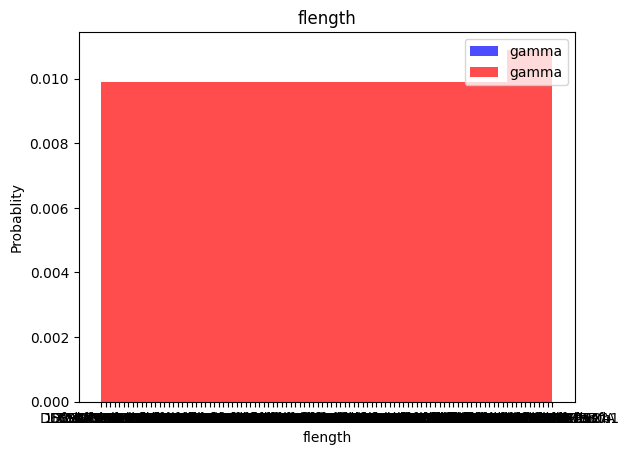

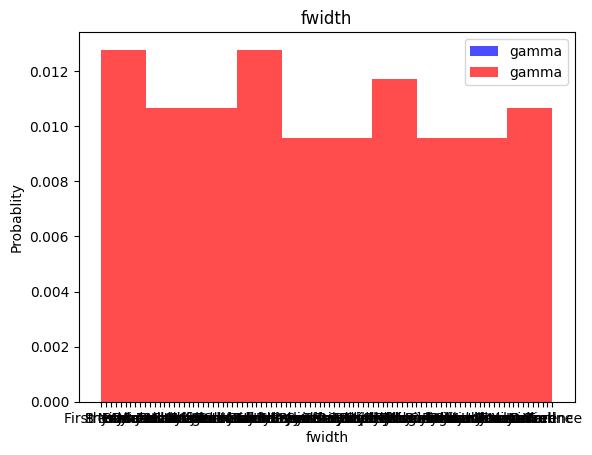

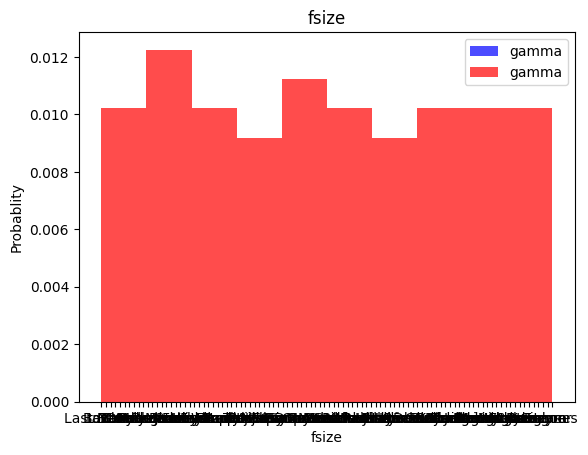

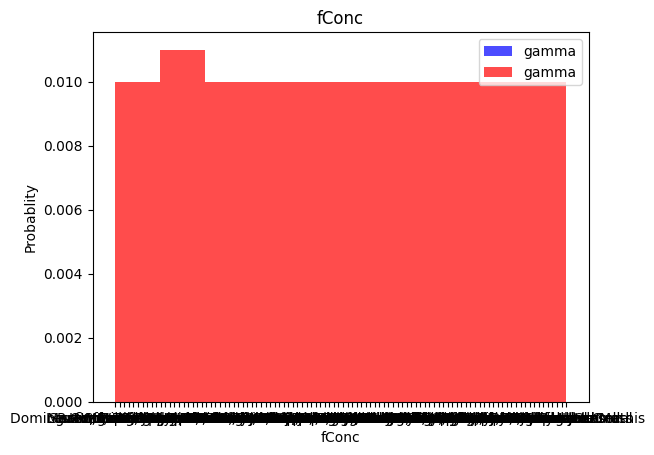

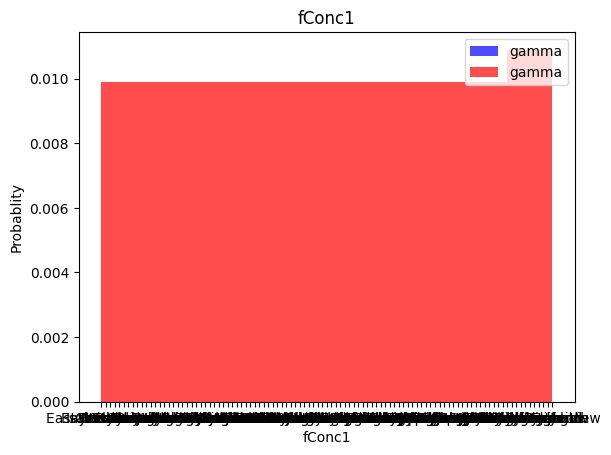

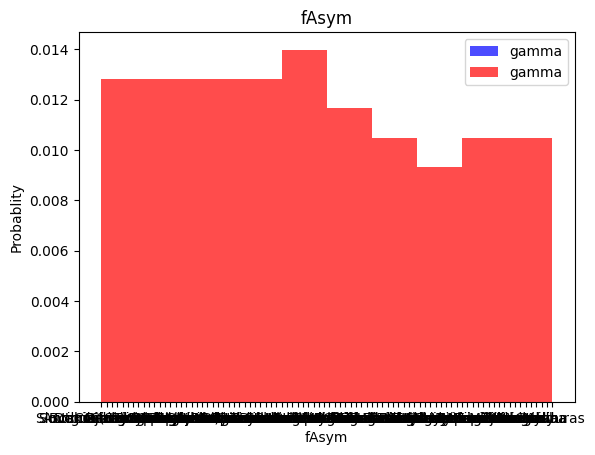

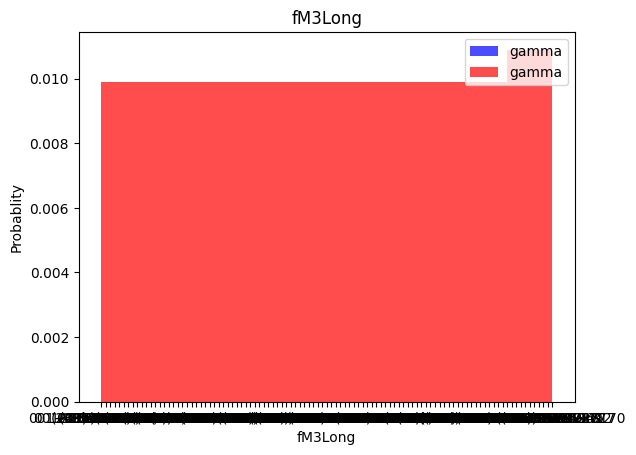

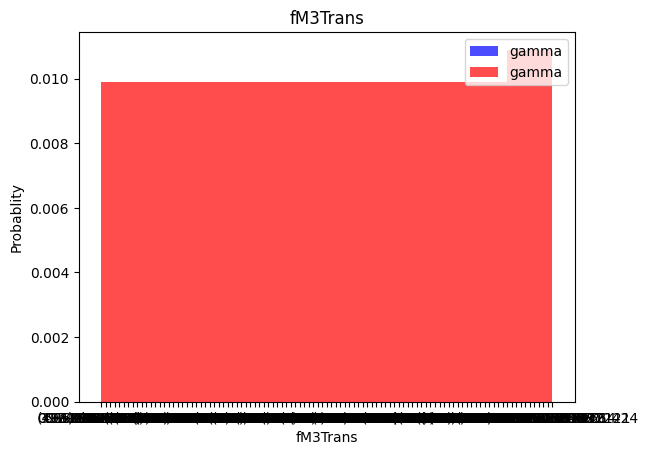

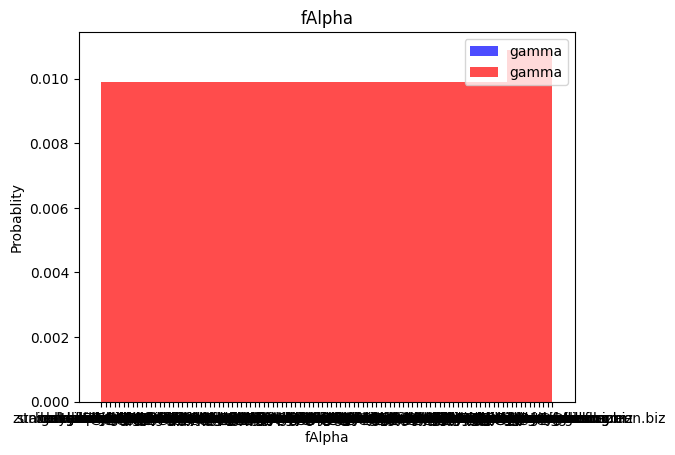

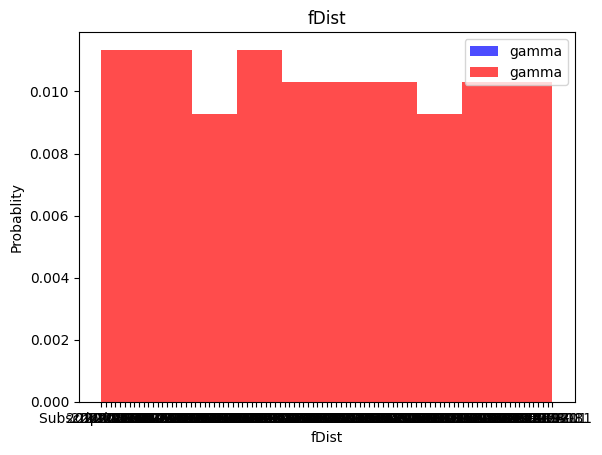

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='gamma', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train # Validation # Test


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y

In [ ]:
len(train), len(valid), len(test)


(60, 20, 21)

KNN


In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [ ]:
encoder = LabelEncoder()

# Iterate through columns and encode if dtype is 'object'
for column in train.columns[:-1]:  # Exclude the target column
    if train[column].dtype == 'object':
        train[column] = encoder.fit_transform(train[column])


In [90]:
X = train.drop(columns=[train.columns[-1]]) # Features: All columns except the last one
y = train[train.columns[-1]]  # Target: The last column

# Split the data into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust random_state as needed

# Now you can fit the model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [93]:
y_pred = knn_model.predict(x_test)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

